In [168]:
import numpy as np
import pandas as pd

In [169]:
column_name=['user_id','item_id', 'ratings', 'timestampes']
ds = pd.read_csv('dataset.csv', sep='\t', names=column_name)
movie_names = pd.read_csv('movieIdTitles.csv')

In [170]:
ds.head()

,user_id,item_id,ratings,timestampes
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [171]:
data = pd.merge(movie_names,ds)
data.drop('timestampes', inplace=True, axis=1)
data    

,item_id,title,user_id,ratings
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3
...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1
99999,1679,B. Monkey (1998),863,3
100000,1680,Sliding Doors (1998),863,2
100001,1681,You So Crazy (1994),896,3


In [172]:
data.groupby('title')['ratings'].mean().sort_values(ascending=False).head()

title
Aiqing wansui (1994)                                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Name: ratings, dtype: float64

In [173]:
data.groupby('title')['ratings'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: ratings, dtype: int64

In [174]:
df = pd.DataFrame(data.groupby('title')['ratings'].mean())
df['numofRatings'] = pd.DataFrame(data.groupby('title')['ratings'].count())
df

,ratings,numofRatings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<Axes: >

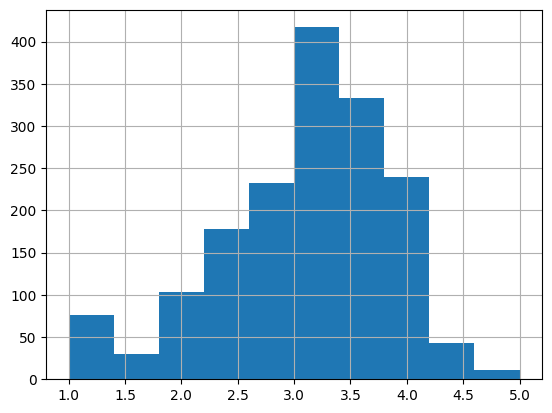

In [175]:
import matplotlib.pyplot as plt
df['ratings'].hist()

<Axes: xlabel='ratings', ylabel='numofRatings'>

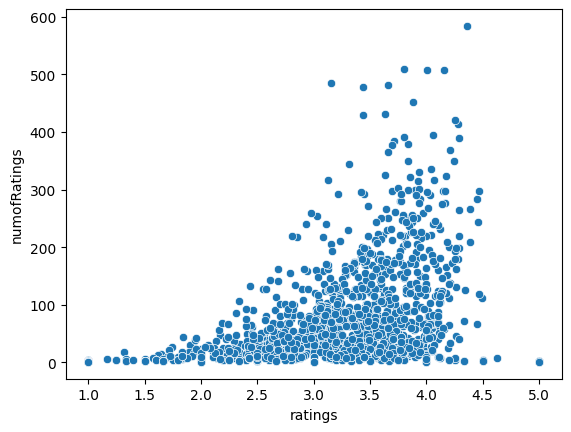

In [176]:
import seaborn as sns
sns.scatterplot(x=df['ratings'], y=df['numofRatings'], legend=True)

In [177]:
movierec = data.pivot_table(index='user_id', columns='title', values='ratings')
movierec

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df.sort_values('numofRatings', ascending=False)

,ratings,numofRatings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
Witness (1985),4.000000,1
All Things Fair (1996),3.000000,1
Wings of Courage (1995),4.000000,1


In [179]:
for i in df.index:
    movieuseratings = movierec[i]
    similarToTheMovie = movierec.corrwith(movieuseratings)
    corrToMovie = pd.DataFrame(similarToTheMovie, columns=['Correlation'])
    corrToMovie.dropna(inplace=True)
    corrToMovie = corrToMovie.join(df['numofRatings'])
    result = corrToMovie[corrToMovie['numofRatings']>100].sort_values('Correlation', ascending=False).head()
    if (result['numofRatings'].count()>=5):
        print(i)
        df.loc[i, 'First Recommendation is: '] = result.iloc[1:2].index.values[0]
        df.loc[i, 'Second Recommendation is: '] = result.iloc[2:3].index.values[0]
        df.loc[i, 'Third Recommendation is: ']=result.iloc[3:4].index.values[0]
        df.loc[i, 'Fourth Recommendation is: ']= result.iloc[4:5].index.values[0]


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

'Til There Was You (1997)
1-900 (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

101 Dalmatians (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

12 Angry Men (1957)
187 (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

2001: A Space Odyssey (1968)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

39 Steps, The (1935)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

8 1/2 (1963)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

8 Heads in a Duffel Bag (1997)
8 Seconds (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

A Chef in Love (1996)
Above the Rim (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Absolute Power (1997)
Abyss, The (1989)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Ace Ventura: Pet Detective (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ace Ventura: When Nature Calls (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Across the Sea of Time (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Addams Family Values (1993)
Addicted to Love (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Addiction, The (1995)
Adventures of Pinocchio, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Affair to Remember, An (1957)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

African Queen, The (1951)
Afterglow (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Age of Innocence, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Air Bud (1997)
Air Force One (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Air Up There, The (1994)
Airheads (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Akira (1988)
Aladdin (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Aladdin and the King of Thieves (1996)
Alaska (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Albino Alligator (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Alice in Wonderland (1951)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Alien (1979)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Alien 3 (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Alien: Resurrection (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Aliens (1986)
All About Eve (1950)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

All Dogs Go to Heaven 2 (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Alphaville (1965)
Amadeus (1984)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Amateur (1994)
Amazing Panda Adventure, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

American Buffalo (1996)
American Dream (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

American President, The (1995)
American Strays (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

American Werewolf in London, An (1981)
American in Paris, An (1951)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Amistad (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Amityville 3-D (1983)
Amityville Curse, The (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Amityville Horror, The (1979)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Amityville II: The Possession (1982)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Amos & Andrew (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

An Unforgettable Summer (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Anaconda (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Anastasia (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Andre (1994)
Angel Baby (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Angel and the Badman (1947)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Angels and Insects (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Angels in the Outfield (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Angus (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Anna (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Anna Karenina (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Anne Frank Remembered (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Annie Hall (1977)
Another Stakeout (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Antonia's Line (1995)
Aparajito (1956)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Apartment, The (1960)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Apocalypse Now (1979)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Apollo 13 (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Apostle, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Apple Dumpling Gang, The (1975)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

April Fool's Day (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Apt Pupil (1998)
Aristocats, The (1970)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Army of Darkness (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Around the World in 80 Days (1956)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Arrival, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Arsenic and Old Lace (1944)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

As Good As It Gets (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Assassins (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Assignment, The (1997)
Associate, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Audrey Rose (1977)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Austin Powers: International Man of Mystery (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Awfully Big Adventure, An (1995)
Ayn Rand: A Sense of Life (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

B*A*P*S (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Babe (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Baby-Sitters Club, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Babysitter, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Back to the Future (1985)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Backbeat (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bad Boys (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bad Company (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bad Girls (1994)
Bad Moon (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bad Taste (1987)
Ballad of Narayama, The (Narayama Bushiko) (1958)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Balto (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bananas (1971)
Band Wagon, The (1953)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Barb Wire (1996)
Barbarella (1968)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Barcelona (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Basic Instinct (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Basketball Diaries, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Basquiat (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bastard Out of Carolina (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Batman & Robin (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Batman (1989)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Batman Forever (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Batman Returns (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bean (1997)
Beans of Egypt, Maine, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Beat the Devil (1954)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Beautician and the Beast, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Beautiful Girls (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Beautiful Thing (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Beauty and the Beast (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Beavis and Butt-head Do America (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bed of Roses (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bedknobs and Broomsticks (1971)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Before Sunrise (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Before and After (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Before the Rain (Pred dozhdot) (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Being Human (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Being There (1979)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Believers, The (1987)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Belle de jour (1967)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ben-Hur (1959)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Benny & Joon (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bent (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Best Men (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Best of the Best 3: No Turning Back (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Better Off Dead... (1985)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Beverly Hillbillies, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Beverly Hills Cop III (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Beverly Hills Ninja (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bewegte Mann, Der (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Beyond Rangoon (1995)
Bhaji on the Beach (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Big Blue, The (Grand bleu, Le) (1988)
Big Bully (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Big Green, The (1995)
Big Lebowski, The (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.ve

Big Night (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Big Sleep, The (1946)
Big Squeeze, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Billy Madison (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bio-Dome (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Birdcage, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Birds, The (1963)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bitter Moon (1992)
Bitter Sugar (Azucar Amargo) (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Black Beauty (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Black Sheep (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Blade Runner (1982)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Blink (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bliss (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Blob, The (1958)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Blood & Wine (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Blood Beach (1981)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Blood For Dracula (Andy Warhol's Dracula) (1974)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bloodsport 2 (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Blown Away (1994)
Blue Angel, The (Blaue Engel, Der) (1930)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Blue Chips (1994)
Blue Sky (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Blue in the Face (1995)
Blues Brothers 2000 (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Blues Brothers, The (1980)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bob Roberts (1992)
Body Parts (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Body Snatcher, The (1945)
Body Snatchers (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Bogus (1996)
Bonheur, Le (1965)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bonnie and Clyde (1967)
Boogie Nights (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Boomerang (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Boot, Das (1981)
Booty Call (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bottle Rocket (1996)
Bound (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Boxing Helena (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Boy's Life 2 (1997)
Boys (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Boys Life (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Boys of St. Vincent, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Boys on the Side (1995)
Boys, Les (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Brady Bunch Movie, The (1995)
Braindead (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bram Stoker's Dracula (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Brassed Off (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Braveheart (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Brazil (1985)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bread and Chocolate (Pane e cioccolata) (1973)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Breakdown (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Breakfast at Tiffany's (1961)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Breaking the Waves (1996)
Bride of Frankenstein (1935)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bridge on the River Kwai, The (1957)
Bridges of Madison County, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bringing Up Baby (1938)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Broken Arrow (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Broken English (1996)
Bronx Tale, A (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Brother Minister: The Assassination of Malcolm X (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Brothers McMullen, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Browning Version, The (1994)
Buddy (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bulletproof (1996)
Bullets Over Broadway (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Burnt By the Sun (1994)
Burnt Offerings (1976)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Bushwhacked (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Butch Cassidy and the Sundance Kid (1969)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Bye Bye, Love (1995)
C'est arrivé près de chez vous (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cabin Boy (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cable Guy, The (1996)
Calendar Girl (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Canadian Bacon (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Candidate, The (1972)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Candyman (1992)
Candyman: Farewell to the Flesh (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cape Fear (1962)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Cape Fear (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Captives (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Career Girls (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Carlito's Way (1993)
Carmen Miranda: Bananas Is My Business (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Caro Diario (Dear Diary) (1994)
Carpool (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Carrie (1976)
Carried Away (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Carrington (1995)
Casablanca (1942)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Casino (1995)
Casper (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Castle Freak (1995)
Cat People (1982)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cat on a Hot Tin Roof (1958)
Cats Don't Dance (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Catwalk (1995)
Caught (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Celluloid Closet, The (1995)
Celtic Pride (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cement Garden, The (1993)
Cemetery Man (Dellamorte Dellamore) (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Chain Reaction (1996)
Chairman of the Board (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Chamber, The (1996)
Charade (1963)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Chasers (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Chasing Amy (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Children of the Corn: The Gathering (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Children of the Revolution (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Chinatown (1974)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Christmas Carol, A (1938)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Chungking Express (1994)
Ciao, Professore! (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Cinderella (1950)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cinema Paradiso (1988)
Circle of Friends (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.ve

Citizen Kane (1941)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Citizen Ruth (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

City Hall (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

City Slickers II: The Legend of Curly's Gold (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

City of Angels (1998)
City of Industry (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

City of Lost Children, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Clean Slate (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Clean Slate (Coup de Torchon) (1981)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Clear and Present Danger (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Clerks (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Client, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cliffhanger (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Clockers (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Clockwork Orange, A (1971)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Close Shave, A (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Clueless (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cobb (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cold Comfort Farm (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Collectionneuse, La (1967)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Colonel Chabert, Le (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Color of Night (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Commandments (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Con Air (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Conan the Barbarian (1981)
Condition Red (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Coneheads (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Congo (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Conspiracy Theory (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Contact (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Contempt (Mépris, Le) (1963)
Convent, The (Convento, O) (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cook the Thief His Wife & Her Lover, The (1989)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Cool Hand Luke (1967)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cool Runnings (1993)
Cop Land (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Cops and Robbersons (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Copycat (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Corrina, Corrina (1994)
Cosi (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Country Life (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Courage Under Fire (1996)
Cowboy Way, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Craft, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Crash (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Crimson Tide (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Critical Care (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cronos (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Crooklyn (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Crossfire (1947)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Crossing Guard, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Crow, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Crow: City of Angels, The (1996)
Crows and Sparrows (1949)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Crucible, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Crumb (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cry, the Beloved Country (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Crying Game, The (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Curdled (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cure, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Cutthroat Island (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Cyrano de Bergerac (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

D3: The Mighty Ducks (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Dances with Wolves (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dangerous Beauty (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dangerous Ground (1997)
Dangerous Minds (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Daniel Defoe's Robinson Crusoe (1996)
Dante's Peak (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dark City (1998)
Dave (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Davy Crockett, King of the Wild Frontier (1955)
Day the Earth Stood Still, The (1951)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Day the Sun Turned Cold, The (Tianguo niezi) (1994)
Daylight (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Days of Thunder (1990)
Daytrippers, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dazed and Confused (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dead Man (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dead Man Walking (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dead Poets Society (1989)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dead Presidents (1995)
Dear God (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Death and the Maiden (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Deceiver (1997)
Deconstructing Harry (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Deep Rising (1998)
Deer Hunter, The (1978)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Delicatessen (1991)
Delta of Venus (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Demolition Man (1993)
Denise Calls Up (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Designated Mourner, The (1997)
Desperado (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Desperate Measures (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Devil in a Blue Dress (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Devil's Advocate, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Devil's Own, The (1997)
Diabolique (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Dial M for Murder (1954)
Die Hard (1988)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Die Hard 2 (1990)
Die Hard: With a Vengeance (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Die xue shuang xiong (Killer, The) (1989)
Dingo (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dirty Dancing (1987)
Disclosure (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Diva (1981)
Dolores Claiborne (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Don Juan DeMarco (1995)
Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Donnie Brasco (1997)
Doom Generation, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Doors, The (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Double Happiness (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Double Team (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Double vie de Véronique, La (Double Life of Veronique, The) (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Down Periscope (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Down by Law (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dracula: Dead and Loving It (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Dragonheart (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dream Man (1995)
Dream With the Fishes (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Drop Dead Fred (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Drop Zone (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Drunks (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Duck Soup (1933)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dumb & Dumber (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Dumbo (1941)
Dunston Checks In (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Duoluo tianshi (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

E.T. the Extra-Terrestrial (1982)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

East of Eden (1955)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Eat Drink Man Woman (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ed (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ed Wood (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ed's Next Move (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Eddie (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Edge, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Emma (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Empire Strikes Back, The (1980)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Enchanted April (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Endless Summer 2, The (1994)
Enfer, L' (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

English Patient, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Eraser (1996)
Escape from L.A. (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Escape from New York (1981)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Escape to Witch Mountain (1975)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Eve's Bayou (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Even Cowgirls Get the Blues (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Evening Star, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Event Horizon (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Everest (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Everyone Says I Love You (1996)
Evil Dead II (1987)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Evita (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Excess Baggage (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Executive Decision (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Exit to Eden (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Exotica (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Extreme Measures (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Eye for an Eye (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Face/Off (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Faces (1968)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fair Game (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

FairyTale: A True Story (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Faithful (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fall (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fallen (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Family Thing, A (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fan, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fantasia (1940)
Far From Home: The Adventures of Yellow Dog (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Farewell My Concubine (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Farewell to Arms, A (1932)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Fargo (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Farinelli: il castrato (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fast, Cheap & Out of Control (1997)
Faster Pussycat! Kill! Kill! (1965)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Fatal Instinct (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Father of the Bride (1950)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Father of the Bride Part II (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fathers' Day (1997)
Faust (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fausto (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Fear (1996)
Fear of a Black Hat (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fearless (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Feast of July (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Feeling Minnesota (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Female Perversions (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Field of Dreams (1989)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Fierce Creatures (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Fifth Element, The (1997)
Fille seule, La (A Single Girl) (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fire Down Below (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Firestorm (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Firm, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

First Kid (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

First Knight (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

First Wives Club, The (1996)
Fish Called Wanda, A (1988)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fled (1996)
Flesh and Bone (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Flintstones, The (1994)
Flipper (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Flirt (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Flirting With Disaster (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Flower of My Secret, The (Flor de mi secreto, La) (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Flubber (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fluke (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Fly Away Home (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fog, The (1980)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fools Rush In (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

For Ever Mozart (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

For Love or Money (1993)
For Richer or Poorer (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

For Whom the Bell Tolls (1943)
For the Moment (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Forbidden Christ, The (Cristo proibito, Il) (1950)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Forbidden Planet (1956)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Foreign Correspondent (1940)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Forget Paris (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Forrest Gump (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Four Days in September (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Four Rooms (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Four Weddings and a Funeral (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fox and the Hound, The (1981)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Foxfire (1996)
Frankie Starlight (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Free Willy (1993)
Free Willy 2: The Adventure Home (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Free Willy 3: The Rescue (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Freeway (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

French Kiss (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

French Twist (Gazon maudit) (1995)
Fresh (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Friday (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Fried Green Tomatoes (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Frighteners, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Frisk (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

From Dusk Till Dawn (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Fugitive, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Full Metal Jacket (1987)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Full Monty, The (1997)
Full Speed (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Funeral, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Funny Face (1957)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

G.I. Jane (1997)
Gabbeh (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Game, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Gandhi (1982)
Gang Related (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Garden of Finzi-Contini, The (Giardino dei Finzi-Contini, Il) (1970)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Gaslight (1944)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Gattaca (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Gay Divorcee, The (1934)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

George of the Jungle (1997)
Georgia (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Germinal (1993)
Geronimo: An American Legend (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Get Shorty (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Get on the Bus (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Getaway, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Getting Even with Dad (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ghost (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ghost and Mrs. Muir, The (1947)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Ghost and the Darkness, The (1996)
Ghost in the Shell (Kokaku kidotai) (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ghosts of Mississippi (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Giant (1956)
Gigi (1958)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Gilligan's Island: The Movie (1998)
Girl 6 (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Glass Shield, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Glengarry Glen Ross (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Glimmer Man, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Glory (1989)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Go Fish (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Godfather, The (1972)
Godfather: Part II, The (1974)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Gold Diggers: The Secret of Bear Mountain (1995)
Golden Earrings (1947)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

GoldenEye (1995)
Gone Fishin' (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Gone with the Wind (1939)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Good Man in Africa, A (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Good Will Hunting (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Good, The Bad and The Ugly, The (1966)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

GoodFellas (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Goofy Movie, A (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Grace of My Heart (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Graduate, The (1967)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Grand Day Out, A (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Grass Harp, The (1995)
Grateful Dead (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Grease (1978)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Grease 2 (1982)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Great Dictator, The (1940)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Great Escape, The (1963)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Great Expectations (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Great Race, The (1965)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Great White Hype, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Gridlock'd (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Grifters, The (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Grosse Fatigue (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Grosse Pointe Blank (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Groundhog Day (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Grumpier Old Men (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Guantanamera (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Guilty as Sin (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Gumby: The Movie (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Hackers (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Half Baked (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Halloween: The Curse of Michael Myers (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Hamlet (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Happy Gilmore (1996)
Hard Eight (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Hard Rain (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Hard Target (1993)
Harlem (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Harold and Maude (1971)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Harriet the Spy (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Hate (Haine, La) (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Haunted World of Edward D. Wood Jr., The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Head Above Water (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Hear My Song (1991)
Hearts and Minds (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Heat (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Heathers (1989)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Heaven & Earth (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Heaven's Prisoners (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Heavenly Creatures (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Heavy (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Heavy Metal (1981)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Heavyweights (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Heidi Fleiss: Hollywood Madam (1995) 
Hellraiser: Bloodline (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Henry V (1989)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Herbie Rides Again (1974)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Hercules (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Hideaway (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

High Noon (1952)
High School High (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Higher Learning (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Highlander (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Highlander III: The Sorcerer (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

His Girl Friday (1940)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Hollow Reed (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Home Alone (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Home Alone 3 (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Home for the Holidays (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Homeward Bound II: Lost in San Francisco (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Homeward Bound: The Incredible Journey (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Hoodlum (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Hoop Dreams (1994)
Horse Whisperer, The (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Horseman on the Roof, The (Hussard sur le toit, Le) (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Hot Shots! Part Deux (1993)
Hotel de Love (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Hour of the Pig, The (1993)
House Arrest (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

House Party 3 (1994)
House of Yes, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

House of the Spirits, The (1993)
Houseguest (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

How to Be a Player (1997)
How to Make an American Quilt (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Howling, The (1981)
Hudsucker Proxy, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Hugo Pool (1997)
Hunchback of Notre Dame, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Hunt for Red October, The (1990)
Hunted, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Hurricane Streets (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

I Can't Sleep (J'ai pas sommeil) (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

I Know What You Did Last Summer (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

I Like It Like That (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

I Love Trouble (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

I Shot Andy Warhol (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

I'll Do Anything (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

I'm Not Rappaport (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

I.Q. (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Ice Storm, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

If Lucy Fell (1996)
Ill Gotten Gains (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Immortal Beloved (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

In & Out (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

In Love and War (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

In the Army Now (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

In the Bleak Midwinter (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

In the Company of Men (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

In the Line of Duty 2 (1987)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

In the Line of Fire (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

In the Mouth of Madness (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

In the Name of the Father (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

In the Realm of the Senses (Ai no corrida) (1976)
Incognito (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Independence Day (ID4) (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Indian Summer (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Indian in the Cupboard, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Indiana Jones and the Last Crusade (1989)
Infinity (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Inkwell, The (1994)
Innocent Sleep, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Innocents, The (1961)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Inspector General, The (1949)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Interview with the Vampire (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Inventing the Abbotts (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Island of Dr. Moreau, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

It Could Happen to You (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

It Happened One Night (1934)
It Takes Two (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

It's My Party (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

It's a Wonderful Life (1946)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Jack (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jack and Sarah (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Jackal, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Jackie Brown (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jackie Chan's First Strike (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jade (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

James and the Giant Peach (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jane Eyre (1996)
Jason's Lyric (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jaws (1975)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Jaws 2 (1978)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jaws 3-D (1983)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jean de Florette (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jefferson in Paris (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jeffrey (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jerky Boys, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jerry Maguire (1996)
Jimmy Hollywood (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Jingle All the Way (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Joe's Apartment (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Johnny 100 Pesos (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Johnny Mnemonic (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Journey of August King, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Joy Luck Club, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jude (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Judge Dredd (1995)
Judgment Night (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jumanji (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jungle Book, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Jungle2Jungle (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Junior (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Jurassic Park (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Juror, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Jury Duty (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Just Cause (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kalifornia (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kama Sutra: A Tale of Love (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kansas City (1996)
Kaspar Hauser (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kazaam (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Keys to Tulsa (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kicked in the Head (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kicking and Screaming (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kid in King Arthur's Court, A (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kids (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kids in the Hall: Brain Candy (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Killer (Bulletproof Heart) (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Killing Fields, The (1984)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Killing Zoe (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kim (1950)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

King of the Hill (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kingpin (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kiss Me, Guido (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kiss of Death (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kiss the Girls (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kissed (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kolya (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Koyaanisqatsi (1983)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kull the Conqueror (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Kundun (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

L.A. Confidential (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Ladybird Ladybird (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Lamerica (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Land Before Time III: The Time of the Great Giving (1995) (V)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Larger Than Life (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Lassie (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Last Action Hero (1993)
Last Dance (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Last Klezmer: Leopold Kozlowski, His Life and Music, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Last Man Standing (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Last Summer in the Hamptons (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Last Supper, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Last Time I Committed Suicide, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Last Time I Saw Paris, The (1954)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Last of the Mohicans, The (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Late Bloomers (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Laura (1944)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Lawnmower Man 2: Beyond Cyberspace (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Lawnmower Man, The (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Lawrence of Arabia (1962)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Lay of the Land, The (1997)
Leading Man, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Leave It to Beaver (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Leaving Las Vegas (1995)
Legal Deceit (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Legends of the Fall (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Letter From Death Row, A (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Liar Liar (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Life Less Ordinary, A (1997)
Life with Mikey (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Lightning Jack (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Like Water For Chocolate (Como agua para chocolate) (1992)
Line King: Al Hirschfeld, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Lion King, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Little Big League (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Little Buddha (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Little Lord Fauntleroy (1936)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Little Odessa (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Little Princess, A (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Little Princess, The (1939)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Little Rascals, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Little Women (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Live Nude Girls (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Living in Oblivion (1995)
Loaded (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Local Hero (1983)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Loch Ness (1995)
Locusts, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Lone Star (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Long Kiss Goodnight, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Looking for Richard (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Lord of Illusions (1995)
Losing Chase (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Losing Isaiah (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Lost Highway (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Lost Horizon (1937)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Lost World: Jurassic Park, The (1997)
Lost in Space (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Love & Human Remains (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Love Affair (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Love Bug, The (1969)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Love Jones (1997)
Love Serenade (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Love and Death on Long Island (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Love and Other Catastrophes (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Love and a .45 (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Love in the Afternoon (1957)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Love! Valour! Compassion! (1997)
Lover's Knot (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Low Down Dirty Shame, A (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

M (1931)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

M*A*S*H (1970)
M. Butterfly (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ma vie en rose (My Life in Pink) (1997)
Machine, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mad City (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Mad Love (1995)
Madame Butterfly (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Made in America (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Madness of King George, The (1994)
Madonna: Truth or Dare (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Magic Hour, The (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Magnificent Seven, The (1954)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Major Payne (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Malice (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Mallrats (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Maltese Falcon, The (1941)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Man Who Knew Too Little, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Man Who Would Be King, The (1975)
Man Without a Face, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Man in the Iron Mask, The (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Man of No Importance, A (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Man of the House (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Man of the Year (1995)
Manchurian Candidate, The (1962)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Manhattan (1979)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Manhattan Murder Mystery (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Manny & Lo (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Manon of the Spring (Manon des sources) (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Margaret's Museum (1995)
Mark of Zorro, The (1940)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Marked for Death (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mars Attacks! (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Marvin's Room (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Mary Poppins (1964)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mary Reilly (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mary Shelley's Frankenstein (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Mask, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

MatchMaker, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Matilda (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Maverick (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Maximum Risk (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Maya Lin: A Strong Clear Vision (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Maybe, Maybe Not (Bewegte Mann, Der) (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

McHale's Navy (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mediterraneo (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Meet John Doe (1941)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Meet Me in St. Louis (1944)
Meet Wally Sparks (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Men With Guns (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Men in Black (1997)
Men of Means (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Menace II Society (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Mercury Rising (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Metisse (Café au Lait) (1993)
Metro (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Miami Rhapsody (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Michael (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Michael Collins (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Microcosmos: Le peuple de l'herbe (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Midnight Dancers (Sibak) (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Midnight in the Garden of Good and Evil (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Mighty Aphrodite (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mighty Morphin Power Rangers: The Movie (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Milk Money (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Miller's Crossing (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Mimic (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mina Tannenbaum (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Miracle on 34th Street (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Mirror Has Two Faces, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mission: Impossible (1996)
Misérables, Les (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mixed Nuts (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Moll Flanders (1996)
Mondo (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Money Talks (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Money Train (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Month by the Lake, A (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Monty Python and the Holy Grail (1974)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Monty Python's Life of Brian (1979)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Moonlight and Valentino (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mortal Kombat (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mortal Kombat: Annihilation (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Mother (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mother Night (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mouse Hunt (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mr. Holland's Opus (1995)
Mr. Jones (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mr. Magoo (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mr. Smith Goes to Washington (1939)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mr. Wrong (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mrs. Brown (Her Majesty, Mrs. Brown) (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mrs. Dalloway (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mrs. Doubtfire (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mrs. Parker and the Vicious Circle (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mrs. Winterbourne (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Much Ado About Nothing (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mulholland Falls (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Multiplicity (1996)
Muppet Treasure Island (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Murder at 1600 (1997)
Murder in the First (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Murder, My Sweet (1944)
Muriel's Wedding (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mute Witness (1994)
My Best Friend's Wedding (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

My Crazy Life (Mi vida loca) (1993)
My Fair Lady (1964)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

My Family (1995)
My Favorite Season (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

My Favorite Year (1982)
My Fellow Americans (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

My Left Foot (1989)
My Life and Times With Antonin Artaud (En compagnie d'Antonin Artaud) (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

My Life as a Dog (Mitt liv som hund) (1985)
My Man Godfrey (1936)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

My Own Private Idaho (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Mystery Science Theater 3000: The Movie (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Nadja (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Naked (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Naked Gun 33 1/3: The Final Insult (1994)
Naked in New York (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

National Lampoon's Senior Trip (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Natural Born Killers (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Nell (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Nelly & Monsieur Arnaud (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Neon Bible, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Net, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

NeverEnding Story III, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

New Jersey Drive (1995)
New York Cop (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Newton Boys, The (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Next Karate Kid, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Nick of Time (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Nico Icon (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Night Falls on Manhattan (1997)
Night Flier (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Night of the Living Dead (1968)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Night on Earth (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Nightmare Before Christmas, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Nightmare on Elm Street, A (1984)
Nightwatch (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Nikita (La Femme Nikita) (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Nil By Mouth (1997)
Nina Takes a Lover (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Nine Months (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ninotchka (1939)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Nixon (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

No Escape (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Nobody's Fool (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

North (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

North by Northwest (1959)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Nosferatu a Venezia (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Nothing to Lose (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Notorious (1946)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Now and Then (1995)
Nowhere (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Nutty Professor, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Nénette et Boni (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Of Human Bondage (1934)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Of Love and Shadows (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)
Old Man and the Sea, The (1958)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Old Yeller (1957)
Oliver & Company (1988)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Omen, The (1976)
On Golden Pond (1981)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Once Upon a Time in America (1984)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Once Upon a Time in the West (1969)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Once Upon a Time... When We Were Colored (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Once Were Warriors (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

One Fine Day (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

One Flew Over the Cuckoo's Nest (1975)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

One Night Stand (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Only You (1994)
Open Season (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Operation Dumbo Drop (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Original Gangstas (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Orlando (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Oscar & Lucinda (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Othello (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Out to Sea (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Outbreak (1995)
Outlaw, The (1943)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Pagemaster, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Pallbearer, The (1996)
Palmetto (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Palookaville (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Panther (1995)
Paper, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Paradise Lost: The Child Murders at Robin Hood Hills (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Paradise Road (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Parent Trap, The (1961)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Paris Is Burning (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Paris, France (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Paris, Texas (1984)
Party Girl (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Passion Fish (1992)
Pather Panchali (1955)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Paths of Glory (1957)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Patton (1970)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Peacemaker, The (1997)
Penny Serenade (1941)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

People vs. Larry Flynt, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Perez Family, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Perfect Candidate, A (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Perfect World, A (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Persuasion (1995)
Pest, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Pete's Dragon (1977)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Phantom, The (1996)
Phantoms (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Phat Beach (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Phenomenon (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Philadelphia (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Philadelphia Story, The (1940)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Piano, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Picnic (1955)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Picture Bride (1995)
Picture Perfect (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Pie in the Sky (1995)
Pillow Book, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Pink Floyd - The Wall (1982)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Pinocchio (1940)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Platoon (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Playing God (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Pocahontas (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Poetic Justice (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Poison Ivy II (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Pollyanna (1960)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Pompatus of Love, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ponette (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Portrait of a Lady, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Postino, Il (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Postman, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Powder (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Preacher's Wife, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Pretty Woman (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Price Above Rubies, A (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Priest (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Primal Fear (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Primary Colors (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Princess Bride, The (1987)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Princess Caraboo (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Prisoner of the Mountains (Kavkazsky Plennik) (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Private Benjamin (1980)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Private Parts (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Professional, The (1994)
Program, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Promesse, La (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Prophecy II, The (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Prophecy, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Psycho (1960)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Pulp Fiction (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Pump Up the Volume (1990)
Purple Noon (1960)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Pushing Hands (1992)
Pyromaniac's Love Story, A (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Queen Margot (Reine Margot, La) (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Quest, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Quick and the Dead, The (1995)
Quiet Man, The (1952)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Quiet Room, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Quiz Show (1994)
Race the Sun (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Radioland Murders (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Raging Bull (1980)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Raiders of the Lost Ark (1981)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Rainmaker, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Raise the Red Lantern (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Raising Arizona (1987)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ran (1985)
Ransom (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ready to Wear (Pret-A-Porter) (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Real Genius (1985)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Reality Bites (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Rear Window (1954)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Rebecca (1940)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Rebel Without a Cause (1955)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Reckless (1995)
Red Corner (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Red Firecracker, Green Firecracker (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Red Rock West (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ref, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Relative Fear (1994)
Relic, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Remains of the Day, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Renaissance Man (1994)
Rendezvous in Paris (Rendez-vous de Paris, Les) (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Rent-a-Kid (1995)
Replacement Killers, The (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Reservoir Dogs (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Restoration (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Return of the Jedi (1983)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Return of the Pink Panther, The (1974)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Rhyme & Reason (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Rich Man's Wife, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Richard III (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Richie Rich (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Ridicule (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Right Stuff, The (1983)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Rising Sun (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

River Wild, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Road to Wellville, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Rob Roy (1995)
Robert A. Heinlein's The Puppet Masters (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Robin Hood: Men in Tights (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Robin Hood: Prince of Thieves (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Robocop 3 (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Rock, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Rocket Man (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Roman Holiday (1953)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Romeo Is Bleeding (1993)
Romper Stomper (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Romy and Michele's High School Reunion (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Room with a View, A (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Roommates (1995)
Roseanna's Grave (For Roseanna) (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Rosencrantz and Guildenstern Are Dead (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Rosewood (1997)
Rough Magic (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ruby in Paradise (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Rudy (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ruling Class, The (1972)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Rumble in the Bronx (1995)
Run of the Country, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

S.F.W. (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sabrina (1954)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sabrina (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Safe (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Safe Passage (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Saint, The (1997)
Salut cousin! (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Santa Clause, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Savage Nights (Nuits fauves, Les) (1992)
Scarlet Letter, The (1926)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Scarlet Letter, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Schindler's List (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Schizopolis (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Scout, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Scream (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Scream 2 (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Screamers (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Search for One-eye Jimmy, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Searching for Bobby Fischer (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Second Jungle Book: Mowgli & Baloo, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Secret Adventures of Tom Thumb, The (1993)
Secret Agent, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Secret Garden, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Secret of Roan Inish, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Secrets & Lies (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Selena (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Sense and Sensibility (1995)
Senseless (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Serial Mom (1994)
Set It Off (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Seven (Se7en) (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Seven Years in Tibet (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Seventh Seal, The (Sjunde inseglet, Det) (1957)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sex, Lies, and Videotape (1989)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sexual Life of the Belgians, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Sgt. Bilko (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Shadow Conspiracy (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Shadow, The (1994)
Shadowlands (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Shaggy Dog, The (1959)
Shall We Dance? (1937)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Shall We Dance? (1996)
Shallow Grave (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Shawshank Redemption, The (1994)
She's So Lovely (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

She's the One (1996)
Shiloh (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Shine (1996)
Shining, The (1980)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Shooter, The (1995)
Shooting Fish (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Short Cuts (1993)
Show, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Showgirls (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Silence of the Lambs, The (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Simple Twist of Fate, A (1994)
Simple Wish, A (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Singin' in the Rain (1952)
Sirens (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Six Degrees of Separation (1993)
Sixth Man, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sleeper (1973)
Sleepers (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sleepless in Seattle (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Sliding Doors (1998)
Sling Blade (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Slingshot, The (1993)
Sliver (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Smile Like Yours, A (1997)
Smilla's Sense of Snow (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Smoke (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Sneakers (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Snow White and the Seven Dwarfs (1937)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

So Dear to My Heart (1949)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

So I Married an Axe Murderer (1993)
Solo (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Some Folks Call It a Sling Blade (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Some Kind of Wonderful (1987)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Some Like It Hot (1959)
Some Mother's Son (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Something to Talk About (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Somewhere in Time (1980)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Son in Law (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sophie's Choice (1982)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Soul Food (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sound of Music, The (1965)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Space Jam (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Spanking the Monkey (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Spawn (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Specialist, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Species (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Speechless (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Speed (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Speed 2: Cruise Control (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Spellbound (1945)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sphere (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Spice World (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Spirits of the Dead (Tre passi nel delirio) (1968)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Spitfire Grill, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Spy Hard (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Squeeze (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Stag (1997)
Stalingrad (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Stalker (1979)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Stand by Me (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Star Maker, The (Uomo delle stelle, L') (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Star Maps (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Star Trek III: The Search for Spock (1984)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Star Trek IV: The Voyage Home (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Star Trek V: The Final Frontier (1989)
Star Trek VI: The Undiscovered Country (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Star Trek: First Contact (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Star Trek: Generations (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Star Trek: The Motion Picture (1979)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Star Trek: The Wrath of Khan (1982)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Star Wars (1977)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Stargate (1994)
Stars Fell on Henrietta, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Starship Troopers (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Steal Big, Steal Little (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Stealing Beauty (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Steel (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Stephen King's The Langoliers (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Sting, The (1973)
Stonewall (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Story of Xinghua, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Strange Days (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Stranger in the House (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Stranger, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Strawberry and Chocolate (Fresa y chocolate) (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Street Fighter (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Streetcar Named Desire, A (1951)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Strictly Ballroom (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Striking Distance (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Stripes (1981)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Striptease (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Stuart Saves His Family (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Stupids, The (1996)
SubUrbia (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Substance of Fire, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Substitute, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sudden Death (1995)
Sudden Manhattan (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sum of Us, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sunset Blvd. (1950)
Sunset Park (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Super Mario Bros. (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Supercop (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Surviving Picasso (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Surviving the Game (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Suture (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Swan Princess, The (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Sweet Hereafter, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Swept from the Sea (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Swimming with Sharks (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Swingers (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Swiss Family Robinson (1960)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Switchback (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Switchblade Sisters (1975)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Sword in the Stone, The (1963)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Tales From the Crypt Presents: Demon Knight (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tales from the Crypt Presents: Bordello of Blood (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tales from the Hood (1995)
Talking About Sex (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tango Lesson, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tank Girl (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Taxi Driver (1976)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Telling Lies in America (1997)
Temptress Moon (Feng Yue) (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Terminal Velocity (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Terminator 2: Judgment Day (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Terminator, The (1984)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Tetsuo II: Body Hammer (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

That Darn Cat! (1965)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

That Darn Cat! (1997)
That Old Feeling (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

That Thing You Do! (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

The Deadly Cure (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

The Innocent (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Theodore Rex (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Thieves (Voleurs, Les) (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Thin Blue Line, The (1988)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Thin Line Between Love and Hate, A (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Thin Man, The (1934)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Things to Do in Denver when You're Dead (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Thinner (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Third Man, The (1949)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Thirty-Two Short Films About Glenn Gould (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

This Is Spinal Tap (1984)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Thousand Acres, A (1997)
Three Caballeros, The (1945)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Three Colors: Blue (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Three Colors: Red (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Three Colors: White (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Three Musketeers, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Three Wishes (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Threesome (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tie Me Up! Tie Me Down! (1990)
Tie That Binds, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Time Tracers (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Time to Kill, A (1996)
Timecop (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tin Cup (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tin Drum, The (Blechtrommel, Die) (1979)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tin Men (1987)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Titanic (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

To Be or Not to Be (1942)
To Catch a Thief (1955)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

To Die For (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

To Gillian on Her 37th Birthday (1996)
To Have, or Not (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

To Kill a Mockingbird (1962)
To Live (Huozhe) (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

To Wong Foo, Thanks for Everything! Julie Newmar (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Tom & Viv (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tom and Huck (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tombstone (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tommy Boy (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tomorrow Never Dies (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Top Gun (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Top Hat (1935)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Total Eclipse (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Touch (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Touch of Evil (1958)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Tough and Deadly (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Toy Story (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Trainspotting (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Transformers: The Movie, The (1986)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Traveller (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Treasure of the Sierra Madre, The (1948)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Trees Lounge (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Trial and Error (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Trial by Jury (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Trigger Effect, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

True Crime (1995)
True Lies (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

True Romance (1993)
Truman Show, The (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Trust (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Truth About Cats & Dogs, The (1996)
Truth or Consequences, N.M. (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Turbo: A Power Rangers Movie (1997)
Turbulence (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Turning, The (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Twelfth Night (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Twelve Monkeys (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Twilight (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Twin Town (1997)
Twisted (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Twister (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Two Bits (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Two Deaths (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Two Much (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Two if by Sea (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Two or Three Things I Know About Her (1966)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

U Turn (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

U.S. Marshalls (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Ulee's Gold (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Unbearable Lightness of Being, The (1988)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Under Siege (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Under Siege 2: Dark Territory (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Underground (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Underneath, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Underworld (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Unforgettable (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Unforgiven (1992)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Unhook the Stars (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Unstrung Heroes (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Until the End of the World (Bis ans Ende der Welt) (1991)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Unzipped (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Up Close and Personal (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Up in Smoke (1978)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Usual Suspects, The (1995)
Vampire in Brooklyn (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Van, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Vanya on 42nd Street (1994)
Vegas Vacation (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Vermin (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Vertigo (1958)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Very Brady Sequel, A (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Victor/Victoria (1982)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Village of the Damned (1995)
Virtuosity (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Visitors, The (Visiteurs, Les) (1993)
Volcano (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Wag the Dog (1997)
Waiting for Guffman (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Waiting to Exhale (1995)
Walk in the Clouds, A (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Walkabout (1971)
Walking Dead, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Walking and Talking (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Wallace & Gromit: The Best of Aardman Animation (1996)
War Room, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

War, The (1994)
Warriors of Virtue (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Washington Square (1997)
Waterworld (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Wedding Gift, The (1994)
Wedding Singer, The (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Weekend at Bernie's (1989)
Welcome To Sarajevo (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Welcome to the Dollhouse (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Wes Craven's New Nightmare (1994)
What Happened Was... (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

What's Eating Gilbert Grape (1993)
What's Love Got to Do with It (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

When Harry Met Sally... (1989)
When Night Is Falling (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

When We Were Kings (1996)
When a Man Loves a Woman (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

When the Cats Away (Chacun cherche son chat) (1996)
While You Were Sleeping (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

White Balloon, The (1995)
White Man's Burden (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

White Squall (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Whole Wide World, The (1996)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Widows' Peak (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyt

Wild America (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Wild Bill (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Wild Bunch, The (1969)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Wild Reeds (1994)
Wild Things (1998)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

William Shakespeare's Romeo and Juliet (1996)
Willy Wonka and the Chocolate Factory (1971)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Wings of Desire (1987)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Wings of the Dove, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Winnie the Pooh and the Blustery Day (1968)
Winter Guest, The (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Wishmaster (1997)
With Honors (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Withnail and I (1987)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Wizard of Oz, The (1939)
Wolf (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Women, The (1939)
Wonderful, Horrible Life of Leni Riefenstahl, The (1993)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Wonderland (1997)
Wooden Man's Bride, The (Wu Kui) (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

World of Apu, The (Apur Sansar) (1959)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Wrong Trousers, The (1993)
Wyatt Earp (1994)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Year of the Horse (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Young Frankenstein (1974)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Young Guns (1988)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Reco

Young Guns II (1990)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Young Poisoner's Handbook, The (1995)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

Zeus and Roxanne (1997)


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\

unknown


c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\MayankMehta\MAYANK\Python Projects\Jupyter_Notebook\Movie Recommendation System\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [181]:
df.head()

,ratings,numofRatings,First Recommendation is:,Second Recommendation is:,Third Recommendation is:,Fourth Recommendation is:
title,,,,,,
'Til There Was You (1997),2.333333,9,Beautiful Girls (1996),Dumbo (1941),"Full Monty, The (1997)",Dave (1993)
1-900 (1994),2.600000,5,Big Night (1996),Babe (1995),Annie Hall (1977),"Bridge on the River Kwai, The (1957)"
101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
187 (1997),3.024390,41,Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Maverick (1994),Cool Hand Luke (1967)


In [201]:
df.loc['Toy Story (1995)']

ratings                                            3.878319
numofRatings                                            452
First Recommendation is:                  Craft, The (1996)
Second Recommendation is:             Down Periscope (1996)
Third Recommendation is:      Miracle on 34th Street (1994)
Fourth Recommendation is:                  G.I. Jane (1997)
Name: Toy Story (1995), dtype: object

In [204]:
df.info

<bound method DataFrame.info of                                         ratings  numofRatings  \
title                                                           
'Til There Was You (1997)              2.333333             9   
1-900 (1994)                           2.600000             5   
101 Dalmatians (1996)                  2.908257           109   
12 Angry Men (1957)                    4.344000           125   
187 (1997)                             3.024390            41   
...                                         ...           ...   
Young Guns II (1990)                   2.772727            44   
Young Poisoner's Handbook, The (1995)  3.341463            41   
Zeus and Roxanne (1997)                2.166667             6   
unknown                                3.444444             9   
Á köldum klaka (Cold Fever) (1994)     3.000000             1   

                                        First Recommendation is:   \
title                                                

In [208]:
df.to_csv("MoviesRecommneded.csv")

In [209]:
df_result=pd.read_csv("MoviesRecommneded.csv")
df_result.head()

,title,ratings,numofRatings,First Recommendation is:,Second Recommendation is:,Third Recommendation is:,Fourth Recommendation is:
0,'Til There Was You (1997),2.333333,9,Beautiful Girls (1996),Dumbo (1941),"Full Monty, The (1997)",Dave (1993)
1,1-900 (1994),2.600000,5,Big Night (1996),Babe (1995),Annie Hall (1977),"Bridge on the River Kwai, The (1957)"
2,101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
3,12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
4,187 (1997),3.024390,41,Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Maverick (1994),Cool Hand Luke (1967)


In [219]:
for i in df.loc['1-900 (1994)']:
    print(i)

2.6
5
Big Night (1996)
Babe (1995)
Annie Hall (1977)
Bridge on the River Kwai, The (1957)


In [229]:
try:
    name = input("Enter name of the movie: ")
    for i in df.loc[name]:
        print(i)
except Exception as e:
    print(str(e) + ' is not available in the dataset!')



3.046728971962617
107
Big Night (1996)
Jackie Brown (1997)
My Best Friend's Wedding (1997)
Welcome to the Dollhouse (1995)
